In [36]:
# This autoformats all code cells into PEP 8 when run, feel free to comment out if not wanted
#%load_ext nb_black

In [37]:
# import libraries:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from skimage.color import rgb2gray
from PIL import Image
from skimage import io
from numpy import *
import plotnine as p9
from tensorflow.linalg import eigh
import regex
import re
from wordcloud import WordCloud
from collections import Counter
from IPython.display import display
import datetime as dt

In [38]:
df = pd.read_csv("../data/AB_NYC_2019.csv")

Data Description:
Data source: http://insideairbnb.com/
48895 listings
16 features: 
    id:                  
    name:                 
    host_id:              
    host_name:            
    neighbourhood_group   
    neighbourhood         
    latitude
    longitude
    room_type
    price
    minimum_nights
    number_of_reviews
    last_review
    reviews_per_month
    calculated_host_listings_count
    availability_365

In [39]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [40]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [41]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

There are 10052 listings without reviews (last_review = NA, reviews_per_month = NA). We remove those observations.

In [42]:
df.dropna(subset=["last_review", "name"], axis=0, inplace=True)

We will not use 'id' and 'host_name' features since it is irrelevant/unethical to our exploration.

In [43]:
df.drop(["id", "host_name"], axis=1, inplace=True)

New dataframe has:
- 38837 unique listings
- 14 features.
- 0 Nan values.

In [44]:
# creating dummy variables based on categorical variables
dummies = pd.get_dummies(df[["neighbourhood_group", "neighbourhood", "room_type"]])
display(dummies.head())

# Join the dataframes, create a new master dataframe so as to not rewrtie below visualization code
dfMaster = df.join(dummies)

# This will effect our computation time since we have substanially increased p
display(dfMaster)

,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_Allerton,neighbourhood_Arden Heights,neighbourhood_Arrochar,neighbourhood_Arverne,neighbourhood_Astoria,...,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,...,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,...,0,0,0,0,0,0,0,0,1,0
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,...,0,0,0,0,0,0,0,1,0,0
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,...,0,0,0,0,0,0,0,1,0,0
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,...,0,0,0,0,0,0,0,1,0,0
5,Large Cozy 1 BR Apartment In Midtown East,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,Lovely Privet Bedroom with Privet Restroom,83554966,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,...,0,0,0,0,0,0,0,0,1,0
48790,No.2 with queen size bed,257683179,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,...,0,0,0,0,0,0,0,0,1,0
48799,Seas The Moment,211644523,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,...,0,0,0,0,0,0,0,0,1,0
48805,1B-1B apartment near by Metro,273841667,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,...,0,0,0,0,0,0,0,1,0,0


In [45]:
# Lastly, update dfMaster to have a column with integer days from last review from current date
dfMaster["last_review"] = pd.to_datetime(dfMaster["last_review"], format="%Y-%m-%d")

# Lets get todays date, subtract it from all dates of last reviews, and make a new column
dfMaster["days_since_review"] = (dfMaster["last_review"] - dt.datetime.now()).dt.days
#Taking absolute value to rid of negatives
dfMaster["days_since_review"] = dfMaster["days_since_review"].abs()
display(dfMaster["days_since_review"])

0        1235
1        1021
3         976
4        1204
5         989
         ... 
48782     974
48790     974
48799     974
48805     974
48852     973
Name: days_since_review, Length: 38837, dtype: int64

In [46]:
dfMaster = dfMaster.drop(['name','last_review', 'host_id', 'latitude', 'longitude', 'days_since_review','neighbourhood_group','neighbourhood','room_type'], axis=1)
dfMaster

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,...,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,149,1,9,0.21,6,365,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,225,1,45,0.38,2,355,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,89,1,270,4.64,1,194,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,80,10,9,0.10,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,200,3,74,0.59,1,129,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,129,1,1,1.00,1,147,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
48790,45,1,1,1.00,6,339,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
48799,235,1,1,1.00,1,87,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
48805,100,1,2,2.00,1,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [47]:
list(dfMaster.columns)

['price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'neighbourhood_group_Bronx',
 'neighbourhood_group_Brooklyn',
 'neighbourhood_group_Manhattan',
 'neighbourhood_group_Queens',
 'neighbourhood_group_Staten Island',
 'neighbourhood_Allerton',
 'neighbourhood_Arden Heights',
 'neighbourhood_Arrochar',
 'neighbourhood_Arverne',
 'neighbourhood_Astoria',
 'neighbourhood_Bath Beach',
 'neighbourhood_Battery Park City',
 'neighbourhood_Bay Ridge',
 'neighbourhood_Bay Terrace',
 'neighbourhood_Bay Terrace, Staten Island',
 'neighbourhood_Baychester',
 'neighbourhood_Bayside',
 'neighbourhood_Bayswater',
 'neighbourhood_Bedford-Stuyvesant',
 'neighbourhood_Belle Harbor',
 'neighbourhood_Bellerose',
 'neighbourhood_Belmont',
 'neighbourhood_Bensonhurst',
 'neighbourhood_Bergen Beach',
 'neighbourhood_Boerum Hill',
 'neighbourhood_Borough Park',
 'neighbourhood_Breezy Point',
 'neighbourhood_Briarwood',
 'neighbourho

In [48]:
dfMaster.reset_index(level=0, inplace=True)
dfMaster = dfMaster.drop(['index'],axis=1)

In [49]:
dfMaster

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,...,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,149,1,9,0.21,6,365,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,225,1,45,0.38,2,355,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,89,1,270,4.64,1,194,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,80,10,9,0.10,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,200,3,74,0.59,1,129,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38832,129,1,1,1.00,1,147,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
38833,45,1,1,1.00,6,339,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
38834,235,1,1,1.00,1,87,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
38835,100,1,2,2.00,1,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [50]:
# saving dataframe in data folder
dfMaster.to_csv("../data/listings.csv")

### Exploring Collinearity between variables
- Cold colors represent higher correlations and hotter colors for lower correlations.
- Darker colors represent a higher magnitude, and brighter colors represent lower magnitude.
- ie. light blue is a positive correlation near 0. dark red is negative correlation near -1.
- It appears that number of reviews and reviews_per_month are highly correlated. No other pair of unique variables demonstrates a high correlation. 

C:\Users\Gianni\AppData\Local\Temp/ipykernel_16304/1542773281.py:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`


<AxesSubplot:>

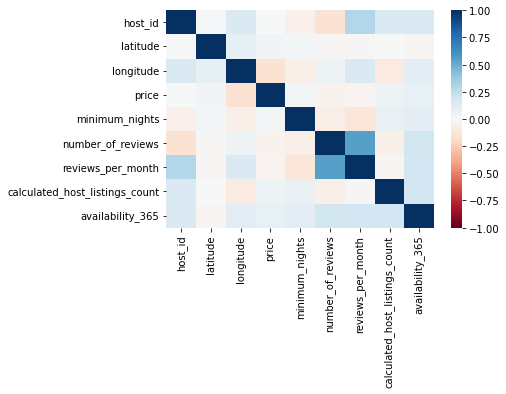

In [51]:
ryb = matplotlib.colors.LinearSegmentedColormap.from_list(
    "", ["green", "yellow", "red"]
)
corr = df.corr()
corr.style.set_precision(3).background_gradient(cmap="RdBu", vmin=-1, vmax=1)
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="RdBu")

In [52]:
X_train = df[
    [
        "host_id",
        "latitude",
        "longitude",
        "minimum_nights",
        "number_of_reviews",
        "reviews_per_month",
        "calculated_host_listings_count",
        "availability_365",
    ]
]
print(X_train)
Y_train = df[["price"]]
print(Y_train)

         host_id  latitude  longitude  minimum_nights  number_of_reviews  \
0           2787  40.64749  -73.97237               1                  9   
1           2845  40.75362  -73.98377               1                 45   
3           4869  40.68514  -73.95976               1                270   
4           7192  40.79851  -73.94399              10                  9   
5           7322  40.74767  -73.97500               3                 74   
...          ...       ...        ...             ...                ...   
48782   83554966  40.78099  -73.95366               1                  1   
48790  257683179  40.75104  -73.81459               1                  1   
48799  211644523  40.54179  -74.14275               1                  1   
48805  273841667  40.80787  -73.92400               1                  2   
48852   74162901  40.69805  -73.92801               1                  1   

       reviews_per_month  calculated_host_listings_count  availability_365  
0         

### Wordcloud of Buzzwords in Listing Name:



In [53]:
def getBuzzwords(df):
    """
    Function getBuzzwords takes in dataframe of all AirBnB property listings 
    and returns a list of all the buzzwords in the playlist from column 'name'.
    """
    all_buzzwords = []
    for i in range(len(df.name.values)):
        m = re.compile(
            r"\w{1,20}.\w{1,20}.\w{1,20}.\w{1,20}.\w{1,20}.\w{1,20}",
            re.MULTILINE | re.DOTALL,
        )
        f = m.findall(df.name.values[i])
        if len(f) > 0:
            for j in range(len(f)):
                all_buzzwords.append(f[j])
    return all_buzzwords

In [54]:
getBuzzwords(df)

['quiet apt home by the park',
 'Skylit Midtown Castle',
 'Cozy Entire Floor of Brownstone',
 'Spacious Studio/Loft by central park',
 'Large Cozy 1 BR Apartment In',
 'Midtown East',
 'BlissArtsSpace',
 "Large Furnished Room Near B'way",
 'Cozy Clean Guest Room',
 'Cozy Lower East Side 1 bdrm',
 'Beautiful 1br on Upper West Side',
 'Central Manhattan/near Broadway',
 'Lovely Room 1',
 'Legal rental',
 'Wonderful Guest Bedroom in Manhattan for',
 'West Village Nest',
 'Only 2 stops to Manhattan studio',
 'Perfect for Your Parents',
 'Chelsea Perfect',
 'Hip Historic Brownstone Apartment with Backyard',
 'Sweet and Spacious Brooklyn Loft',
 'CBG CtyBGd HelpsHaiti rm#1:1',
 'CBG Helps Haiti Room#2.5',
 'CBG Helps Haiti Rm',
 'MAISON DES SIRENES1,bohemian apartment',
 'Sunny Bedroom Across Prospect Park',
 'Midtown Pied-a-terre',
 'LOVELY FURNISHED MANHATTAN BEDROOM',
 'EAST VILLAGE',
 'front room/double bed',
 'Spacious 1 bedroom in luxe building',
 'Loft in Williamsburg Area w',
 'back 

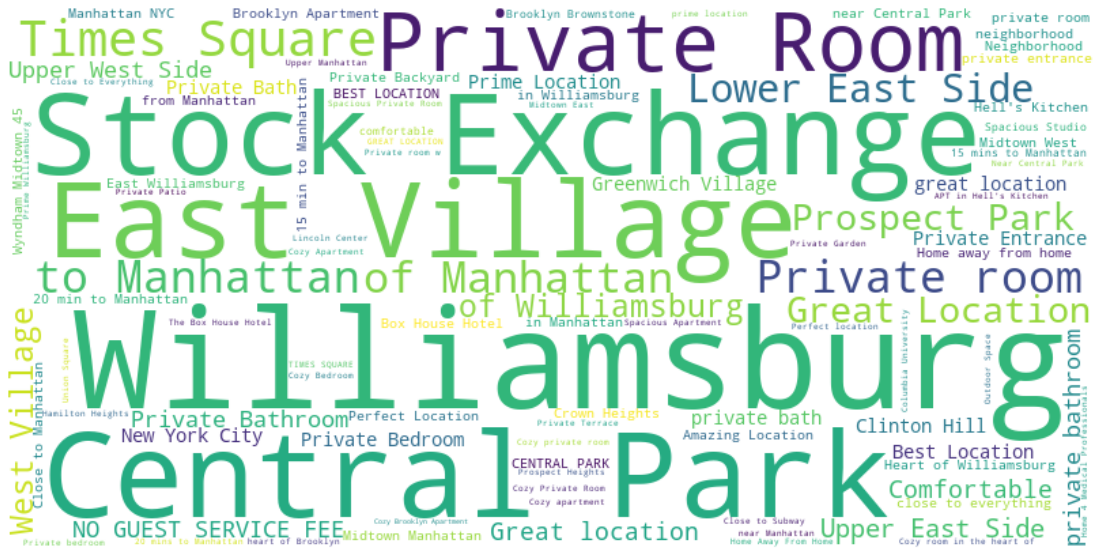

In [55]:
wc = WordCloud(
    background_color="white", width=800, height=400, max_words=100
).generate_from_frequencies(Counter(list(getBuzzwords(df))))
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()